# Visualization

Here I'll do some data viz to get a better understanding of my stuff

### Presentation color codes:
 - greenish => \#1AAEA6
 - blackish => \#273948
 - pinkish  => \#F59899

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import numpy as np
from nltk.corpus import stopwords
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 24


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
df = pd.read_csv('../data/nice_data.csv').dropna(subset=['Critic_Score'])
plots = pd.read_csv('../data/fsm_set.csv').drop('Unnamed: 0', axis=1)
df.sample(10)

In [ ]:
plots.sample()

The first thing I'd like to see is if there is any kind of general correlation between game system and review score

In [ ]:
df.groupby('Platform')['Critic_Score'].median().sort_values().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by System');

**Alright** looks like we have some kind of correlation

in some of these cases this difference is probably not statistically significant, because a few of these systems are only representing a few games total

### Brief time-series tangent

Curious to see the review scores over time

In [ ]:
df.groupby('Year_of_Release')['Critic_Score'].median().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by Release Year');

In [ ]:
df[df.Year_of_Release == 1996]

In [ ]:
df.Critic_Count.sum(), df.User_Count.sum()

In [ ]:
df.Rating.value_counts()

In [ ]:
plt.scatter(df.Critic_Score, df.Global_Sales*1000000);
plt.yscale('log')

In [2]:
df.corr()

NameError: name 'df' is not defined

In [3]:
df.groupby('Genre')['Critic_Score'].mean().sort_values().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by Genre');

NameError: name 'df' is not defined

In [4]:
df['score_bins'] = pd.cut(df.Critic_Score,[0,20,30,40,50,60,70,80,90,100])
df.Global_Sales *= 1000000
df.head()

NameError: name 'df' is not defined

In [13]:
sbb = df.groupby('score_bins')['Global_Sales'].median()
sbb

score_bins
(0, 20]        90000.0
(20, 30]      110000.0
(30, 40]      100000.0
(40, 50]      130000.0
(50, 60]      160000.0
(60, 70]      190000.0
(70, 80]      300000.0
(80, 90]      620000.0
(90, 100]    1720000.0
Name: Global_Sales, dtype: float64

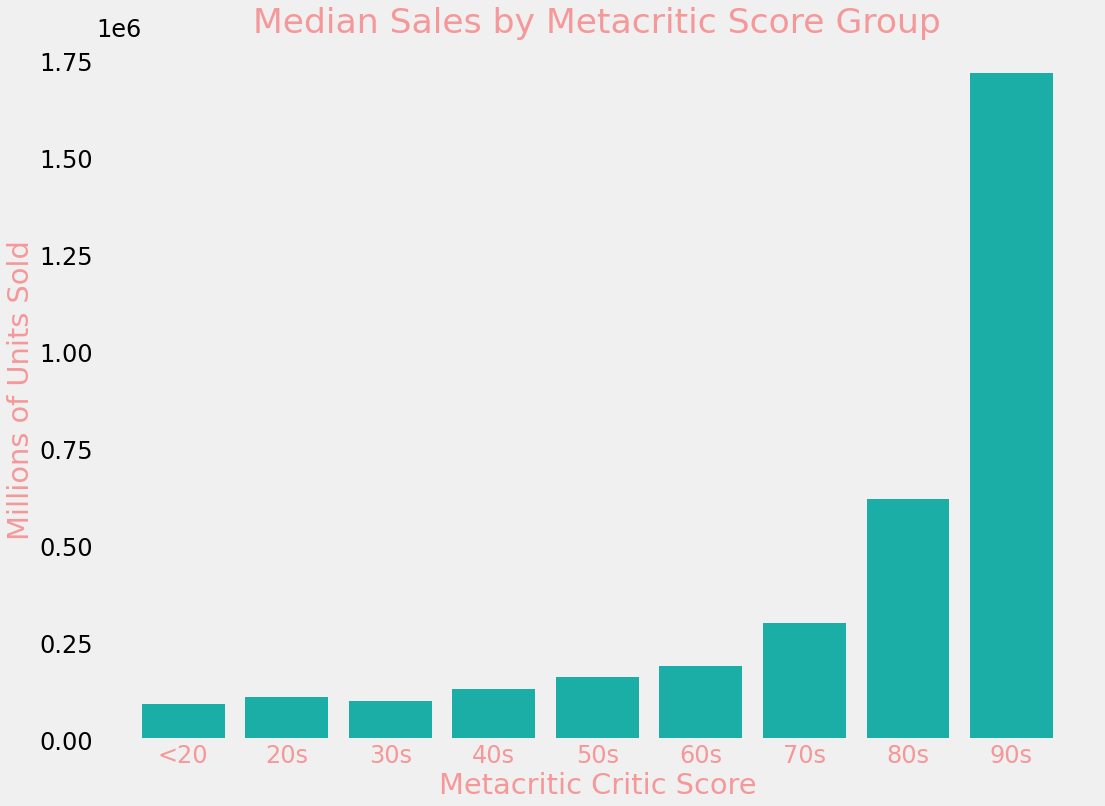

In [14]:
fig, ax = plt.subplots(figsize=(16,12))
ax.bar(sbb.index.astype(str), sbb.values, color='#1AAEA6')
ax.grid(False)
plt.rc_context({'axes.edgecolor':'#F59899', 'xtick.color':'#F59899', 'ytick.color':'#F59899', 'figure.facecolor':'white'})
ax.set_xticklabels(('<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'), color='#F59899')
ax.set_ylabel('Millions of Units Sold', color='#F59899')
ax.set_xlabel('Metacritic Critic Score', color='#F59899')
ax.set_title('Median Sales by Metacritic Score Group', color='#F59899')

plt.savefig('../src/figures/median_sales.png', transparent=True)


#plt.ylim(5e4,5e6)

If you earn above a 90 on Metacritic, you are basically guaranteed some level of sales

If you don't earn above a 60 on metacritic, your maximum possible sales will be severly limited

**aside** I'm just curious what our critic count column looks like...probably should've checked this one out earlier

In [15]:
df.Critic_Count.describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

That's awesome, at minimum these critic scores are the average of 3 reviewers, with an average of 26 reviews making up one score

In [16]:
def make_word_cloud(words, image_path,
                    save_loc='../src/figures/wordcloud.png'):
    '''
    take in an image filepath and a string of words
    and produce a wordcloud image 
    also save this image to 'save_loc'
    '''
    from PIL import Image
    from wordcloud import ImageColorGenerator, WordCloud
    import numpy as np
    import string
    
    stopword_list = stopwords.words('english')
    
    char_mask = np.array(Image.open(image_path))
    image_colors = ImageColorGenerator(char_mask)
    
    long = ' '.join([entry.lower() for entry in words])
    long = ''.join([ch for ch in long if ch not in string.punctuation])
    final = ' '.join([word.strip() for word in long if word not in stopword_list])
    
    wc = WordCloud(background_color='white', max_words=200, width=400, height=400,
                  mask=char_mask, random_state=1).generate(final)
    plt.imshow(wc.recolor(color_func=image_colors))

In [17]:
make_word_cloud(plots.plots.values, '../src/figures/controller1.png')

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [18]:
words, image_path = plots.plots.values, '../src/figures/controller2.png'

In [19]:
from PIL import Image
from wordcloud import ImageColorGenerator, WordCloud
import numpy as np
import string

stopword_list = stopwords.words('english')

char_mask = np.array(Image.open(image_path))
image_colors = ImageColorGenerator(char_mask)

long = ' '.join([entry.lower() for entry in words])
long = ''.join([ch for ch in long if ch not in string.punctuation])
final = ' '.join([word.strip() for word in long.split() if word not in stopword_list])



In [ ]:
wc = WordCloud(max_words=200, background_color='white',
              mask=char_mask, random_state=1)
wc.generate(final)
plt.imshow(wc, )
plt.axis('off')

In [ ]:
def success(value):
    '''
    function for binning the critic scores
    '''
    
    if value > 60:
        if value > 75:
            return 2
        return 1
    return 0
df['success'] = df.Critic_Score.apply(success)

In [ ]:
table = df.groupby(['success', 'Rating'])['Global_Sales'].sum().unstack().T.dropna()

In [ ]:
table.plot(kind='barh', stacked=True, figsize=(16,8))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(16,16))
plot_confusion_matrix(rf, X_test_tf, y_test, cmap='magma');